<a href="https://colab.research.google.com/github/uol-mediaprocessing-2023-2024-classroom/project-cartoonifiers/blob/main/CartoonifyColab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cartoonify Project

Medienverarbeitung, UOL

Antoine Daligault, Bastien Vincent and Vincent Voisin

The main objective of this project is to take a picture and transform it to give it a Cartoon aesthetic.

For this, we are using Python and OpenCV to apply filters to an image and transform it.


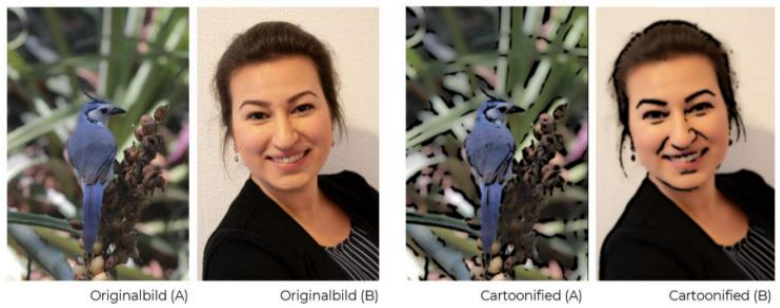

Another important criteria to respect is to make this process interractable with the user. For this we are also implementing a web interface using Vue.

# Using Filters

In [16]:
# this cell is specific to google colab and is used to mount the drive files
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
# basic imports needed throughout the project
import cv2

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

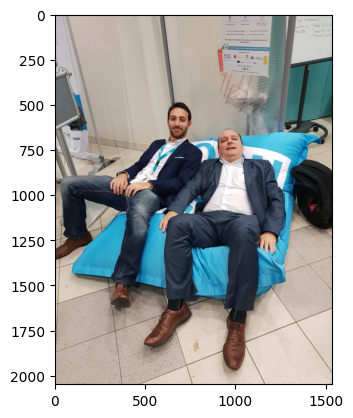

In [29]:
# load the original image stored in the drive,  and show it
imgbase = cv2.imread('/content/drive/MyDrive/Colab Notebooks/chill.jpg')
imgbase = cv2.cvtColor(imgbase, cv2.COLOR_BGR2RGB)
plt.imshow(imgbase)

Increasing the contrast

Cartoons are often bright and contrasted images. Increasing the contrast will also help with the edges and other filters.

But we want to avoid saturating the image too much, so we use a specific method called CLAHE, coupled with another color space than BGR or RGB.

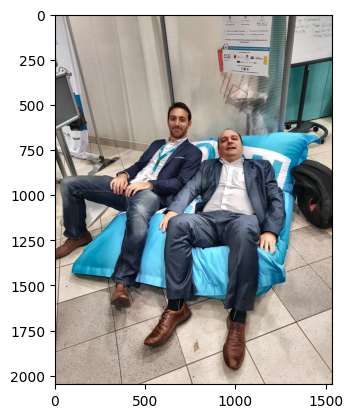

In [31]:
#converting to LAB color space
lab= cv2.cvtColor(imgbase, cv2.COLOR_RGB2LAB)
l_channel, a, b = cv2.split(lab)

# Applying CLAHE to L-channel to increase the contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(9,9)) #the limit and grid size can be user interactable
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))

# Converting image from LAB back to BGR color
img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
plt.imshow(img)

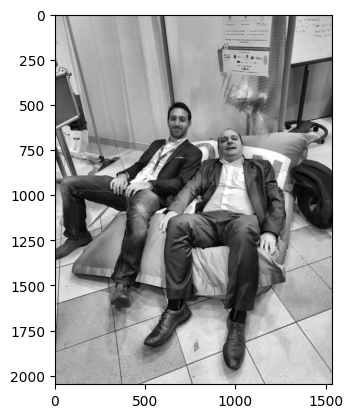

In [37]:
# convert the image to grayscale
grayimg = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
grayimg = cv2.medianBlur(grayimg, 5)
plt.imshow(grayimg, cmap='gray')

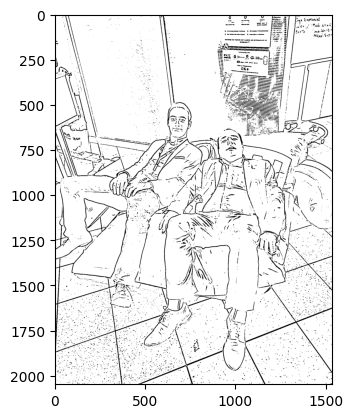

In [39]:
# applying the edge filter
kernel = 9 #size of kernel determined by the user. the bigger it is, the less noise we get but the image needs to be large enough to keep all basic details
edges = cv2.adaptiveThreshold(grayimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, kernel, kernel)
plt.imshow(edges, cmap='gray')

Reducing the Color Palette

A key difference between photographs and cartoons is the number of distinct colors. A cartoon sketch will have less colors as compared to an actual picture. So we use a method called "colour quantization". This will reduce the number of colours in the image.

K Means clustering algorithm is used to perform the process. The “k” value is adjusted  by the user depending on the number of colors needed.

In [40]:
#color quantization
#k value determines the total number of colors in the image, the user will be able to change it
k = 32

# Transform the image
data = np.float32(img).reshape((-1, 3))

# Determine criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
ret, label, center = cv2.kmeans(data, k, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
result = center[label.flatten()]
result = result.reshape(img.shape)

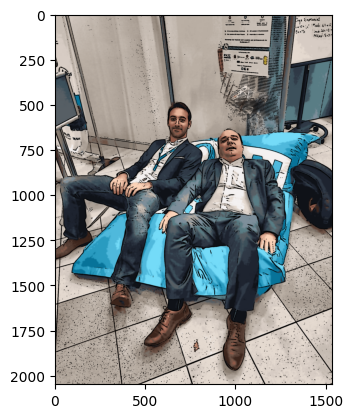

In [41]:
# the final result printed in colors
color = cv2.bilateralFilter(result, 9, 250, 250)
cartoon = cv2.bitwise_and(color, color, mask=edges)
plt.imshow(cartoon)

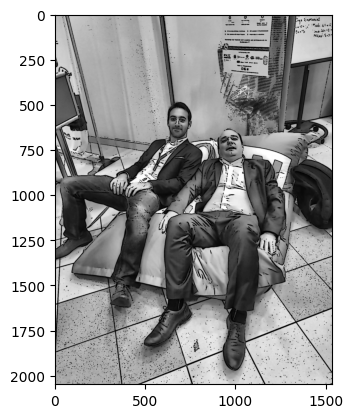

In [42]:
# also available in grayscale, if wanted  by the user
color = cv2.bilateralFilter(grayimg, 9, 250, 250)
cartoon = cv2.bitwise_and(color, color, mask=edges)
plt.imshow(cartoon, cmap='gray')

# Using AI

# Web Interface